```#Creditos Lira Hashtag```
### Previsão de Vendas
O desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que em uma empresa fictícia que investe em: TV, Jornal e Rádio.

In [ ]:
# Instalar as Libs
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [2]:
# Importar a Base de Dados para
import pandas as pd
import seaborn as sns  # Criação dos Gráficos
import matplotlib.pyplot as plt  # Exibição dos Gráficos

from sklearn.model_selection import train_test_split  # Lib Machine Learning
from sklearn.linear_model import LinearRegression # Modelo Machine Learning
from sklearn.ensemble import RandomForestRegressor  # Modelo Machine Learning
from sklearn import metrics # Comparacao entre IAs

In [4]:
# Obs: Na tabela o investimento estão em milhares de reais, e as vendas em milhões

tabela = pd.read_csv('publicidade.csv')
display(tabela)

tabela.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


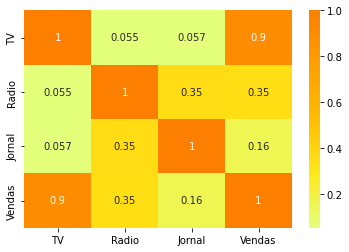

In [5]:
# Analise Exploratória

# Criar Grafico
            # Apresenta a Correlação entre cada um dos itens
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)

# Exibir o Grafico
plt.show()

In [6]:
# Preparação dos Dados para treinar o modelo de Machine Learning

# Separar os dados em dados de treino e dados de teste
y = tabela['Vendas']  # Quem eu quero prever
x = tabela[['TV', 'Radio', 'Jornal']]  # Quem eu vou usar para fazer a previsao

# Ira pegar de forma aleatória partes da base de dados, e separa-las, em uma parte de treino e outra de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, test_size=0.3, random_state=1)

In [7]:
# Escolher qual modelo usar

# Criar uma IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [8]:
# Teste IA
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste,previsao_arvoredecisao))

0.9071151423684274
0.9659583447067105


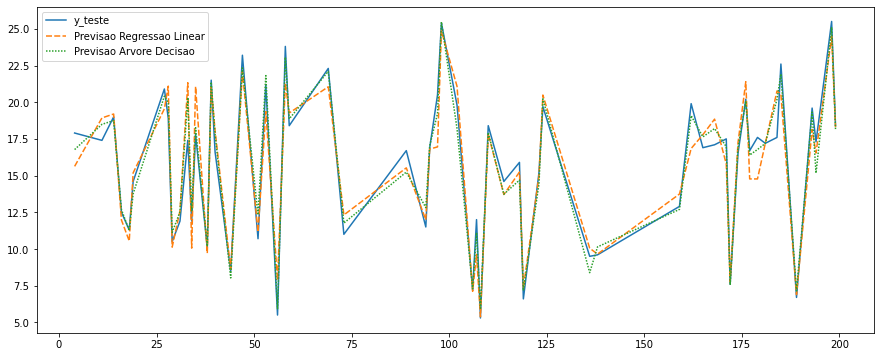

In [9]:
# Visualização Gráfica das Previsões
# A arvore de decisão é o melhor modelo 

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao Arvore Decisao'] = previsao_arvoredecisao

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [10]:
# Fazendo agora novas previsões
# importar nova tabela com as informações de propaganda em TV, Radio e Jornal
# Passa a nova tabela para o predict do seu modelo

novos = pd.read_csv('novos.csv')
print(novos)

previsao = modelo_arvoredecisao.predict(novos)
print(previsao)

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
[ 7.816  8.854 19.978]


In [ ]:
# Adicionando nova coluna
novos['Vendas'] = previsao
print(novos)

# Exportar Nova Tabela com Previsao
novos.to_excel('Tabela com Previsao.xlsx', index=False)
